<a href="https://colab.research.google.com/github/eabhi-me/ai-ml-block/blob/main/object-detection/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
import cv2
import numpy as np
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:


def detect_objects(image_path):
    """
    Detect objects in an image using YOLOv8.

    Args:
        image_path: Path to the input image

    Returns:
        Detected objects and class labels.
    """
    # Load YOLO model
    model = YOLO('yolov8n.pt')  # Load the model

    # Read image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform detection
    results = model(image_rgb)[0]

    # Create a copy of the image for drawing
    annotated_image = image_rgb.copy()

    # Generate random colors for classes
    np.random.seed(42)  # For consistent colors
    colors = np.random.randint(0, 255, size=(100, 3), dtype=np.uint8)

    # To hold class names and their corresponding colors
    class_labels = {}

    # Process detections
    boxes = results.boxes

    return boxes, results.names, annotated_image, colors


In [6]:

def show_results(image_path, confidence_threshold):
    """
    Show original image and detection results side by side.

    Args:
        image_path: Path to the input image
        confidence_threshold: Minimum confidence score for detections
    """
    # Read original image
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Get detection results
    boxes, class_names, annotated_image, colors = detect_objects(image_path)

    # Process each detected object and apply confidence threshold filtering
    class_labels = {}
    for box in boxes:
        # Get box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Get confidence score
        confidence = float(box.conf[0])

        # Only show detections above confidence threshold
        if confidence > confidence_threshold:
            # Get class id and name
            class_id = int(box.cls[0])
            class_name = class_names[class_id]

            # Get color for this class
            color = colors[class_id % len(colors)].tolist()

            # Draw bounding box
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), color, 2)

            # Store class name and color for legend
            class_labels[class_name] = color

    # Create figure
    plt.figure(figsize=(15, 7))

    # Show original image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')

    # Show detection results
    plt.subplot(1, 2, 2)
    plt.title('Detected Objects')
    plt.imshow(annotated_image)
    plt.axis('off')

    # Create legend
    legend_handles = []
    for class_name, color in class_labels.items():
        normalized_color = np.array(color) / 255.0  # Normalize the color
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                                           markerfacecolor=normalized_color, markersize=10))

    plt.legend(handles=legend_handles, loc='upper right', title='Classes')

    plt.tight_layout()
    plt.show()



100%|██████████| 6.25M/6.25M [00:00<00:00, 75.7MB/s]



0: 448x640 2 persons, 1 dog, 376.0ms
Speed: 13.9ms preprocess, 376.0ms inference, 33.3ms postprocess per image at shape (1, 3, 448, 640)


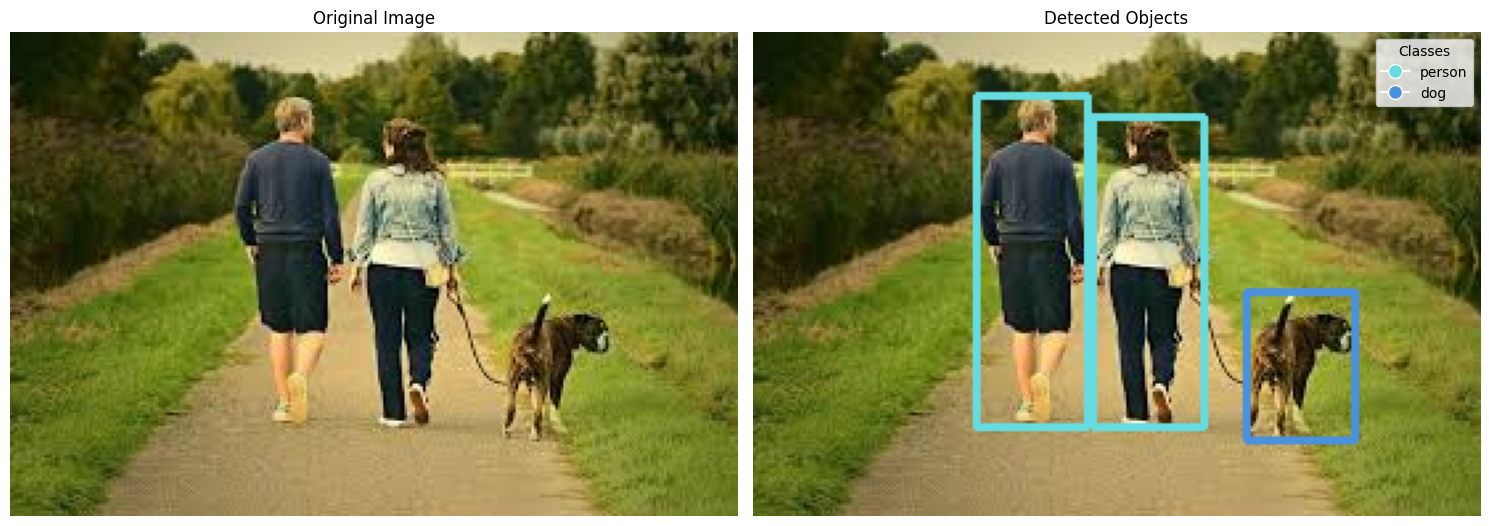

In [8]:
# Example usage:
show_results('test.jpeg', confidence_threshold=0.2)